In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ccecc8ad1d8ab6868bb0beb01093a3ac


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ccecc8ad1d8ab6868bb0beb01093a3ac&q=Boston


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | fethiye
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | muisne
Processing Record 5 of Set 1 | fairbanks
Processing Record 6 of Set 1 | berdigestyakh
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | buenaventura
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | ouallam
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | kieta
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | muros
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | balgazyn
Processing Record 

Processing Record 35 of Set 4 | sorvag
City not found. Skipping...
Processing Record 36 of Set 4 | quatre cocos
Processing Record 37 of Set 4 | chokurdakh
Processing Record 38 of Set 4 | isangel
Processing Record 39 of Set 4 | praya
Processing Record 40 of Set 4 | gamba
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | manzhouli
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | alma
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | ust-tsilma
Processing Record 47 of Set 4 | tecoanapa
Processing Record 48 of Set 4 | gao
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 2 of Set 5 | wewak
Processing Record 3 of Set 5 | general roca
Processing Record 4 of Set 5 | kutum
Processing Record 5 of Set 5 | abbeyfeale
Processing Record 6 of Set 5 | nikolskoye
Proc

Processing Record 29 of Set 8 | rawah
Processing Record 30 of Set 8 | yulara
Processing Record 31 of Set 8 | kyzyl-suu
Processing Record 32 of Set 8 | broken hill
Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | lavrentiya
Processing Record 35 of Set 8 | miram shah
Processing Record 36 of Set 8 | makakilo city
Processing Record 37 of Set 8 | obo
Processing Record 38 of Set 8 | ranau
Processing Record 39 of Set 8 | papetoai
Processing Record 40 of Set 8 | ust-uda
Processing Record 41 of Set 8 | saleaula
City not found. Skipping...
Processing Record 42 of Set 8 | lakes entrance
Processing Record 43 of Set 8 | mae sai
Processing Record 44 of Set 8 | chokwe
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | mocambique
City not found. Skipping...
Processing Record 47 of Set 8 | vestmannaeyjar
Processing Record 48 of Set 8 | oeiras
Processing Record 49 of Set 8 | tabalosos
Processing Record 50 of Set 8 | vila velha
Processing Record 1 of Set 9 | nya

Processing Record 15 of Set 12 | shenjiamen
Processing Record 16 of Set 12 | ashoknagar
Processing Record 17 of Set 12 | pervomayskoye
Processing Record 18 of Set 12 | myaundzha
Processing Record 19 of Set 12 | miyako
Processing Record 20 of Set 12 | paradwip
City not found. Skipping...
Processing Record 21 of Set 12 | forio
Processing Record 22 of Set 12 | dabou
Processing Record 23 of Set 12 | mount hagen
Processing Record 24 of Set 12 | beitbridge
Processing Record 25 of Set 12 | kimbe
Processing Record 26 of Set 12 | buin
Processing Record 27 of Set 12 | lakatoro
Processing Record 28 of Set 12 | santa rosa
Processing Record 29 of Set 12 | hun
Processing Record 30 of Set 12 | nyurba
Processing Record 31 of Set 12 | raudeberg
Processing Record 32 of Set 12 | christchurch
Processing Record 33 of Set 12 | lazaro cardenas
Processing Record 34 of Set 12 | micomeseng
Processing Record 35 of Set 12 | dawlatabad
Processing Record 36 of Set 12 | bargal
City not found. Skipping...
Processing 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,70.52,70,20,4.61,MX,2022-02-11 02:21:05
1,Fethiye,36.6217,29.1164,37.27,45,0,6.20,TR,2022-02-11 02:24:46
2,Muisne,0.6000,-80.0333,76.03,83,100,5.26,EC,2022-02-11 02:24:46
3,Fairbanks,64.8378,-147.7164,-6.18,76,20,3.44,US,2022-02-11 02:20:01
4,Berdigestyakh,62.0989,126.6992,-20.85,95,56,3.38,RU,2022-02-11 02:24:47
5,Barrow,71.2906,-156.7887,-16.58,69,100,9.22,US,2022-02-11 02:24:47
6,Buenaventura,3.8801,-77.0312,74.44,96,100,3.09,CO,2022-02-11 02:24:12
7,Atuona,-9.8000,-139.0333,78.64,71,13,17.13,PF,2022-02-11 02:24:47
8,Punta Arenas,-53.1500,-70.9167,44.71,57,75,5.75,CL,2022-02-11 02:23:21
9,Ouallam,14.3188,2.0866,70.03,11,0,10.74,NE,2022-02-11 02:24:48


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-02-11 02:21:05,22.8909,-109.9124,70.52,70,20,4.61
1,Fethiye,TR,2022-02-11 02:24:46,36.6217,29.1164,37.27,45,0,6.20
2,Muisne,EC,2022-02-11 02:24:46,0.6000,-80.0333,76.03,83,100,5.26
3,Fairbanks,US,2022-02-11 02:20:01,64.8378,-147.7164,-6.18,76,20,3.44
4,Berdigestyakh,RU,2022-02-11 02:24:47,62.0989,126.6992,-20.85,95,56,3.38
...,...,...,...,...,...,...,...,...,...
568,Senanga,ZM,2022-02-11 02:39:35,-16.1167,23.2667,65.55,92,17,3.76
569,Pangai,TO,2022-02-11 02:39:35,-19.8000,-174.3500,86.11,66,40,11.50
570,Anderson,US,2022-02-11 02:39:35,34.5334,-82.6499,54.14,58,0,0.00
571,Kirakira,SB,2022-02-11 02:39:36,-10.4544,161.9205,82.72,80,88,9.44


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

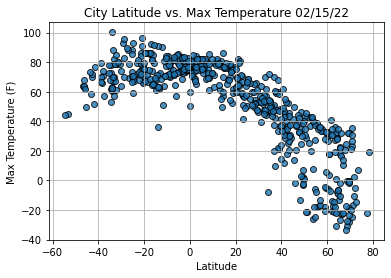

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

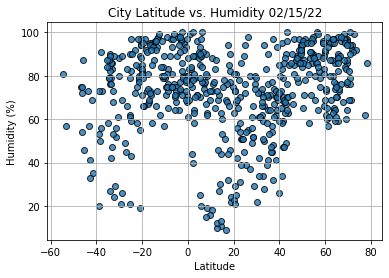

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

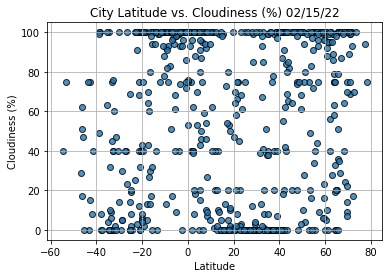

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

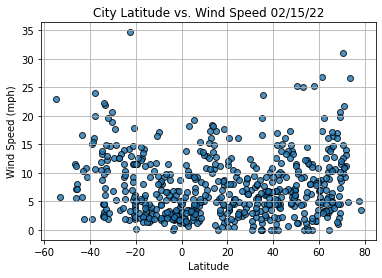

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                Mar Del Plata
Country                        AR
Date          2022-02-11 02:24:49
Lat                      -38.0023
Lng                      -57.5575
Max Temp                    70.88
Humidity                       91
Cloudiness                      0
Wind Speed                   20.0
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
568    False
569    False
570     True
571    False
572    False
Name: Lat, Length: 573, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-02-11 02:21:05,22.8909,-109.9124,70.52,70,20,4.61
1,Fethiye,TR,2022-02-11 02:24:46,36.6217,29.1164,37.27,45,0,6.20
2,Muisne,EC,2022-02-11 02:24:46,0.6000,-80.0333,76.03,83,100,5.26
3,Fairbanks,US,2022-02-11 02:20:01,64.8378,-147.7164,-6.18,76,20,3.44
4,Berdigestyakh,RU,2022-02-11 02:24:47,62.0989,126.6992,-20.85,95,56,3.38


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

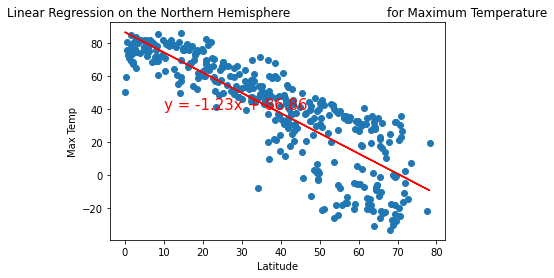

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

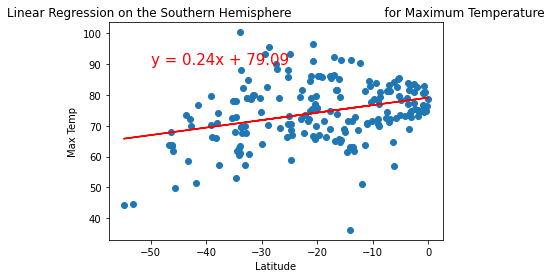

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))


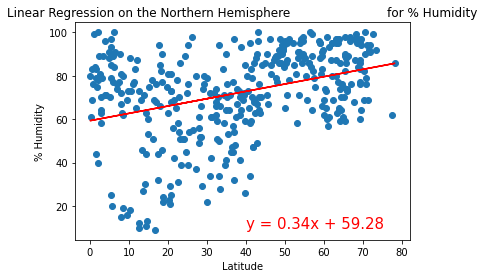

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

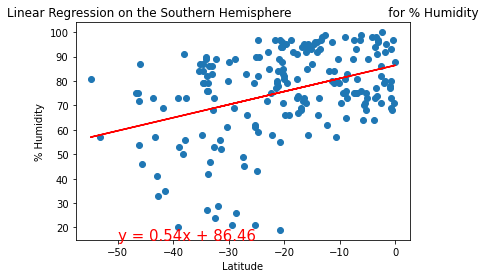

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

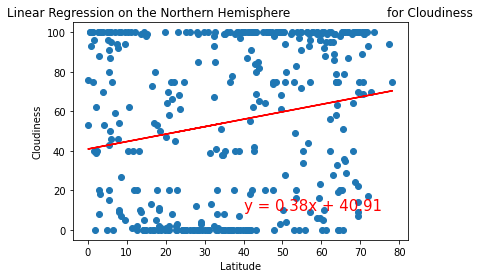

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

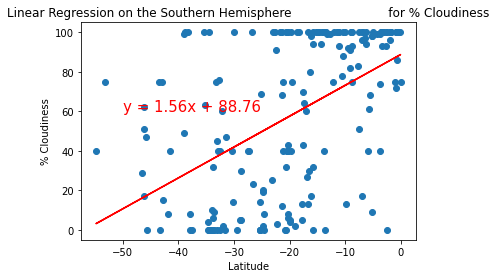

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

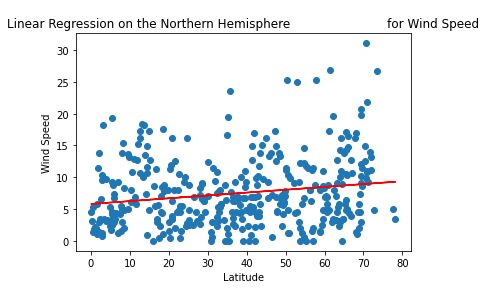

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,35))


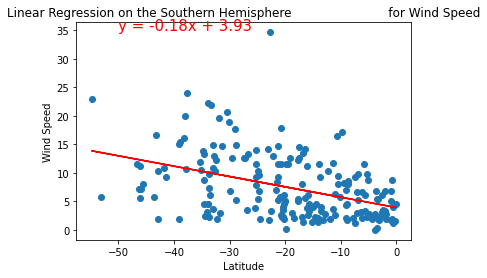

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))